# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [146]:
df = pd.read_csv('/content/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [147]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [148]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [150]:
df.dtypes

,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


In [151]:
df.shape

(12316, 32)

In [152]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [153]:
df.duplicated().sum()

0

In [154]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [155]:
df['Educational_level'].unique()

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [156]:
df['Accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [157]:
df['Vehicle_driver_relation'].unique()

array(['Employee', 'Unknown', 'Owner', nan, 'Other'], dtype=object)

In [158]:
df['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', nan, 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [159]:
df['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', nan,
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

I will start with Handling Missing Values:

In [160]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [161]:
# drop these columns because usually we dont need it when we do prediction the Accident_severity (my Opinion)
df = df.drop(['Educational_level'], axis=1)
df = df.drop(['Vehicle_driver_relation'], axis=1)
df = df.drop(['Owner_of_vehicle'], axis=1)
df = df.drop(['Work_of_casuality'], axis=1)


# Driving_experience
df["Driving_experience"].fillna(df["Driving_experience"].mode()[0],inplace=True)
#Type_of_vehicle
df["Type_of_vehicle"].fillna(df["Type_of_vehicle"].mode()[0],inplace=True)
#Service_year_of_vehicle
df["Service_year_of_vehicle"].fillna(df["Service_year_of_vehicle"].mode()[0],inplace=True)
#Defect_of_vehicle
df["Defect_of_vehicle"].fillna(df["Defect_of_vehicle"].mode()[0],inplace=True)
#Area_accident_occured
df["Area_accident_occured"].fillna(df["Area_accident_occured"].mode()[0],inplace=True)
#Fitness_of_casuality
df["Fitness_of_casuality"].fillna(df["Fitness_of_casuality"].mode()[0],inplace=True)


# Drop theses rows because it is have a few null valuse compared with the full dataset
df.dropna(subset=['Lanes_or_Medians'],inplace = True)
df.dropna(subset=['Road_allignment'],inplace = True)
df.dropna(subset=['Types_of_Junction'],inplace = True)
df.dropna(subset=['Road_surface_type'],inplace = True)
df.dropna(subset=['Type_of_collision'],inplace = True)
df.dropna(subset=['Vehicle_movement'],inplace = True)

In [162]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Driving_experience,0
Type_of_vehicle,0
Service_year_of_vehicle,0
Defect_of_vehicle,0
Area_accident_occured,0
Lanes_or_Medians,0


In [163]:
df['Time'] = pd.to_datetime(df['Time'])

<ipython-input-163-1bfd8981fe14>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


- Label Encoding

In [164]:
from sklearn.preprocessing import LabelEncoder

# useing LabelEncoding to avoid increase the dimensionality of the datase
le = LabelEncoder()
for i in ['Day_of_week', 'Age_band_of_driver', 'Driving_experience', 'Type_of_vehicle', 'Service_year_of_vehicle', 'Sex_of_driver'
,'Defect_of_vehicle','Area_accident_occured','Lanes_or_Medians','Road_allignment','Types_of_Junction','Road_surface_type','Road_surface_conditions',
          'Light_conditions','Weather_conditions','Type_of_collision','Vehicle_movement','Casualty_class','Sex_of_casualty','Age_band_of_casualty','Casualty_severity',
          'Fitness_of_casuality','Pedestrian_movement','Cause_of_accident','Accident_severity','Time']:
    df[i] = le.fit_transform(df[i])



In [165]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Driving_experience,Type_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1,725,1,1,1,3,11,2,2,6,4,...,2,2,3,2,5,3,2,5,16,2
3,42,3,0,1,2,11,5,2,6,6,...,2,2,2,0,0,2,2,5,1,2
4,42,3,0,1,1,0,2,2,4,6,...,2,2,3,2,5,3,2,5,16,2
7,743,0,0,1,1,0,3,2,9,6,...,1,10,3,2,5,3,2,5,12,2
8,743,0,0,1,3,5,0,2,4,6,...,1,2,2,1,4,2,2,0,1,2


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

- Heatmap

<Axes: >

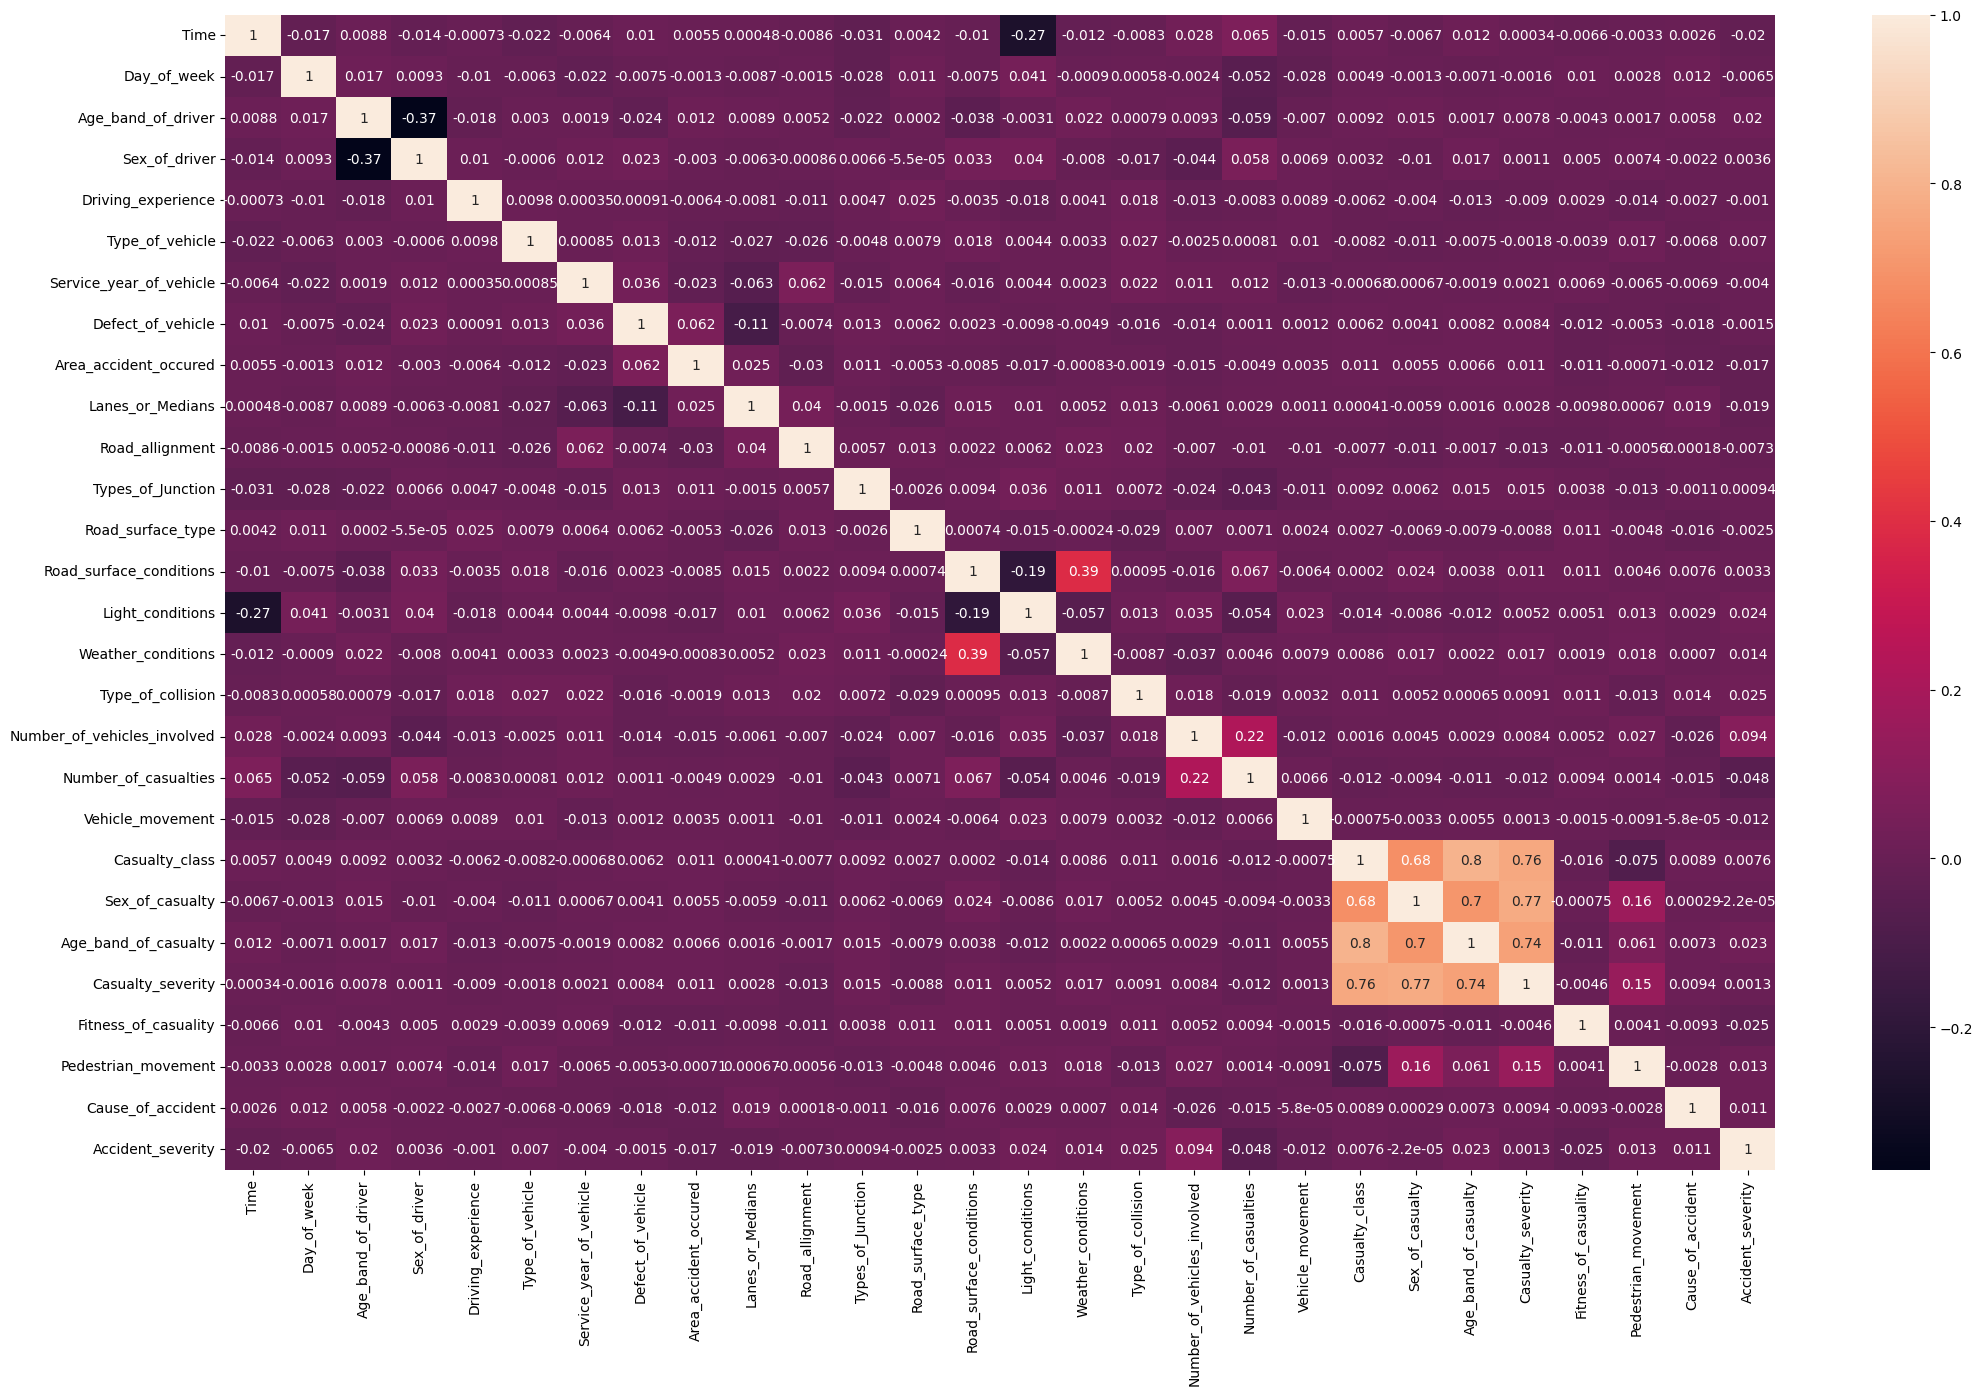

In [183]:
correlation = df.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation,annot=True)

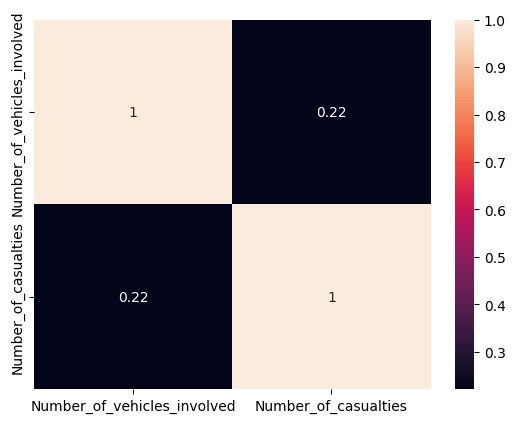

In [179]:
correlation_matrix = df[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

- Line plots

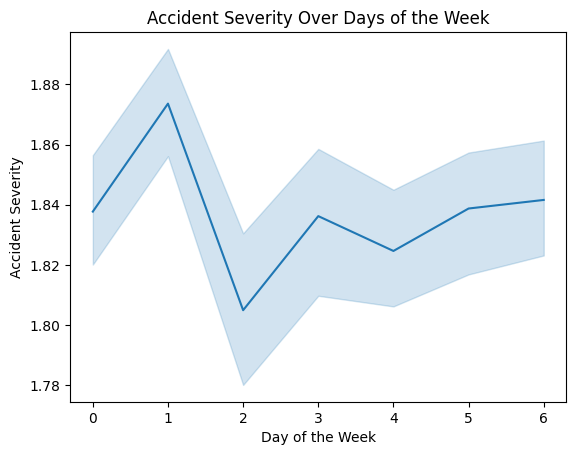

In [77]:
sns.lineplot(data=df, x='Day_of_week', y='Accident_severity')
plt.title('Accident Severity Over Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Accident Severity')
plt.show()

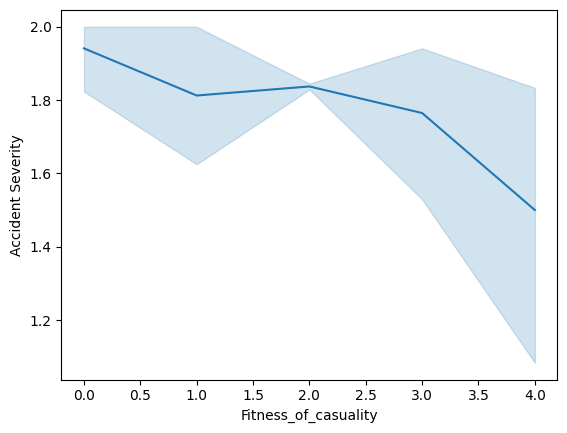

In [80]:
sns.lineplot(data=df, x='Fitness_of_casuality', y='Accident_severity')
plt.title('')
plt.xlabel('Fitness_of_casuality')
plt.ylabel('Accident Severity')
plt.show()

- Scatter plots

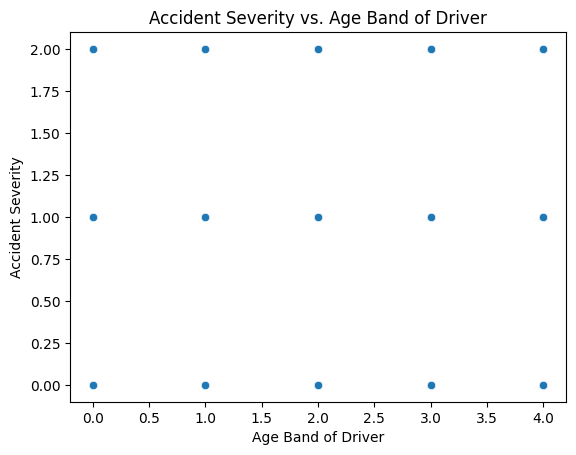

In [81]:
sns.scatterplot(data=df, x='Age_band_of_driver', y='Accident_severity')
plt.title('Accident Severity vs. Age Band of Driver')
plt.xlabel('Age Band of Driver')
plt.ylabel('Accident Severity')
plt.show()

- Histograms

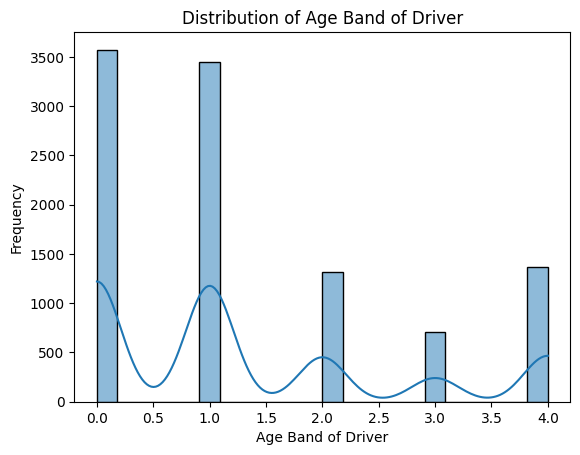

In [82]:
sns.histplot(data=df, x='Age_band_of_driver', kde=True)
plt.title('Distribution of Age Band of Driver')
plt.xlabel('Age Band of Driver')
plt.ylabel('Frequency')
plt.show()

- Boxplots

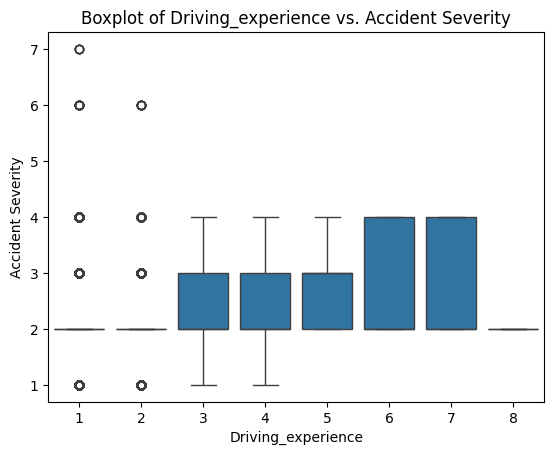

In [178]:
sns.boxplot(data=df, y='Number_of_vehicles_involved', x='Number_of_casualties')
plt.title('Boxplot of Number_of_vehicles_involved vs. Number_of_casualties')
plt.xlabel('Number_of_casualties')
plt.ylabel('Number_of_vehicles_involved')
plt.show()

- Pie Char

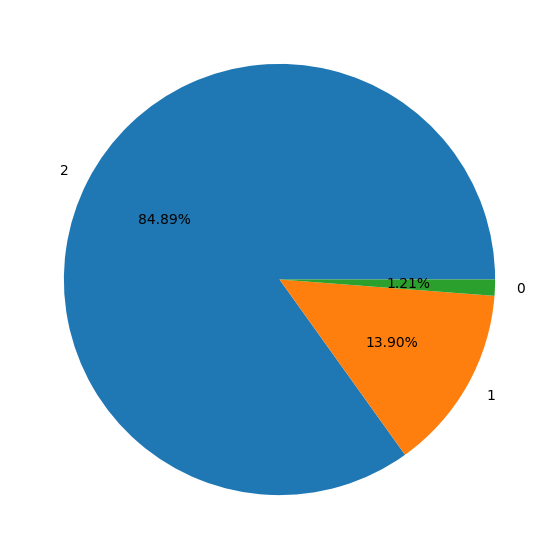

In [180]:
plt.figure(figsize=(10,7))
plt.pie(x=df['Accident_severity'].value_counts().values,labels=df['Accident_severity'].value_counts().index,autopct='%2.2f%%')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


confusion_matrixLR = confusion_matrix(y_test, y_pred)
accuracyLR = accuracy_score(y_test, y_pred)
f1_scoreLR = f1_score(y_test, y_pred, average='weighted')
precision_scoreLR = precision_score(y_test, y_pred, average='weighted')
recall_scoreLR = recall_score(y_test, y_pred, average='weighted')
# roc_curveLR = roc_curve(y_test, y_pred)
# aucLR = auc(y_test, y_pred)
classification_report_LR = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

#### Decision Tree Classifier

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



confusion_matrixDT = confusion_matrix(y_test, y_pred)
accuracyDT = accuracy_score(y_test, y_pred)
f1_scoreDT = f1_score(y_test, y_pred, average='weighted')
precision_scoreDT = precision_score(y_test, y_pred, average='weighted')
recall_scoreDT = recall_score(y_test, y_pred, average='weighted')
# roc_curveLR = roc_curve(y_test, y_pred)
# aucLR = auc(y_test, y_pred)
classification_report_DT = classification_report(y_test, y_pred)

#### Support Vector Machine (SVM)

In [171]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


confusion_matrixSVM = confusion_matrix(y_test, y_pred)
accuracySVM = accuracy_score(y_test, y_pred)
f1_scoreSVM = f1_score(y_test, y_pred, average='weighted')
precision_scoreSVM = precision_score(y_test, y_pred, average='weighted')
recall_scoreSVM = recall_score(y_test, y_pred, average='weighted')
# roc_curveLR = roc_curve(y_test, y_pred)
# aucLR = auc(y_test, y_pred)
classification_report_SVM = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14

#### K-Neighbors Classifier

In [172]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)



confusion_matrixKN = confusion_matrix(y_test, y_pred)
accuracyKN = accuracy_score(y_test, y_pred)
f1_scoreKN = f1_score(y_test, y_pred, average='weighted')
precision_scoreKN = precision_score(y_test, y_pred, average='weighted')
recall_scoreKN = recall_score(y_test, y_pred, average='weighted')
# roc_curveLR = roc_curve(y_test, y_pred)
# aucLR = auc(y_test, y_pred)
classification_report_KN = classification_report(y_test, y_pred)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

1. Logistic Regression

In [173]:
print("Confusion Matrix:")
print(confusion_matrixLR)
print("\nAccuracy:", accuracyLR)
print("F1 Score:", f1_scoreLR)
print("Precision Score:", precision_scoreLR)
print("Recall Score:", recall_scoreLR)
print("Classification Report:")
print(classification_report_LR)

Confusion Matrix:
[[   0    0   26]
 [   0    0  266]
 [   0    0 1791]]

Accuracy: 0.8598175708113298
F1 Score: 0.7950094317620504
Precision Score: 0.7392862550758962
Recall Score: 0.8598175708113298
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00       266
           2       0.86      1.00      0.92      1791

    accuracy                           0.86      2083
   macro avg       0.29      0.33      0.31      2083
weighted avg       0.74      0.86      0.80      2083



2. Decision Tree Classifier

In [174]:
print("Confusion Matrix:")
print(confusion_matrixDT)
print("\nAccuracy:", accuracyDT)
print("F1 Score:", f1_scoreDT)
print("Precision Score:", precision_scoreDT)
print("Recall Score:", recall_scoreDT)
print("Classification Report:")
print(classification_report_DT)

Confusion Matrix:
[[   6    6   14]
 [   4   84  178]
 [  17  245 1529]]

Accuracy: 0.7772443590974556
F1 Score: 0.7871907720559858
Precision Score: 0.7986878886742987
Recall Score: 0.7772443590974556
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.23      0.23        26
           1       0.25      0.32      0.28       266
           2       0.89      0.85      0.87      1791

    accuracy                           0.78      2083
   macro avg       0.45      0.47      0.46      2083
weighted avg       0.80      0.78      0.79      2083



3. Support Vector Machine (SVM)

In [175]:
print("Confusion Matrix:")
print(confusion_matrixSVM)
print("\nAccuracy:", accuracySVM)
print("F1 Score:", f1_scoreSVM)
print("Precision Score:", precision_scoreSVM)
print("Recall Score:", recall_scoreSVM)
print("Classification Report:")
print(classification_report_SVM)

Confusion Matrix:
[[   0    0   26]
 [   0    0  266]
 [   0    0 1791]]

Accuracy: 0.8598175708113298
F1 Score: 0.7950094317620504
Precision Score: 0.7392862550758962
Recall Score: 0.8598175708113298
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00       266
           2       0.86      1.00      0.92      1791

    accuracy                           0.86      2083
   macro avg       0.29      0.33      0.31      2083
weighted avg       0.74      0.86      0.80      2083



4. K-Neighbors Classifier

In [176]:
print("Confusion Matrix:")
print(confusion_matrixKN)
print("\nAccuracy:", accuracyKN)
print("F1 Score:", f1_scoreKN)
print("Precision Score:", precision_scoreKN)
print("Recall Score:", recall_scoreKN)
print("Classification Report:")
print(classification_report_KN)

Confusion Matrix:
[[   0    1   25]
 [   0   18  248]
 [   1   47 1743]]

Accuracy: 0.8454152664426309
F1 Score: 0.8011661973580474
Precision Score: 0.7782113319949373
Recall Score: 0.8454152664426309
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.27      0.07      0.11       266
           2       0.86      0.97      0.92      1791

    accuracy                           0.85      2083
   macro avg       0.38      0.35      0.34      2083
weighted avg       0.78      0.85      0.80      2083



## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

The conclusion for the different models is as follows:

1. **Logistic Regression Model**:
   - **Accuracy**: 0.8598
   - **F1 Score**: 0.7950
   - **Precision Score**: 0.7393
   - **Recall Score**: 0.8598
   
   The Logistic Regression model demonstrated strong performance with an accuracy of 85.98%. The F1 score indicates a balanced performance in terms of precision and recall. This model may be suitable when a balance between precision and recall is desired.

2. **Decision Tree Classifier**:
   - **Accuracy**: 0.7772
   - **F1 Score**: 0.7872
   - **Precision Score**: 0.7987
   - **Recall Score**: 0.7772
   
   The Decision Tree Classifier had a lower accuracy of 77.72% compared to other models. However, it showed a relatively high precision score, which indicates it makes fewer false positive errors. This model might be chosen if the cost of false positives is high.

3. **Support Vector Machine (SVM)**:
   - **Accuracy**: 0.8598
   - **F1 Score**: 0.7950
   - **Precision Score**: 0.7393
   - **Recall Score**: 0.8598
   
   The SVM model shares the same accuracy, F1 score, precision, and recall as the Logistic Regression model, suggesting similar performance.

4. **KNeighbors Classifier**:
   - **Accuracy**: 0.8454
   - **F1 Score**: 0.8012
   - **Precision Score**: 0.7782
   - **Recall Score**: 0.8454
   
   The KNeighbors Classifier had a slightly lower accuracy than the Logistic Regression and SVM models but a higher F1 score. This indicates a good balance between precision and recall. It might be a good choice when a slight improvement in F1 score is preferred over accuracy.

Finally, the Logistic Regression and SVM models performed the best in terms of accuracy, while the KNeighbors Classifier showed a slight edge in the F1 score. The Decision Tree Classifier, despite its lower accuracy, had the highest precision score, which might be preferable in scenarios where minimizing false positives is crucial.





Majd Alotaibi